### Import Libraries

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np  # Numerical computations
import pandas as pd  # Data manipul* ation
import matplotlib.pyplot as plt  # Visualizations
import seaborn as sns  # Advanced visualizations

### Load Cleaned Dataset

In [2]:
data = pd.read_csv("C:/Users/muge/Dropbox/GMU/Portfolio/AIT 580/Movies/cleaned_movies_data.csv")

In [3]:
#1. Check the structure of the dataset:
#Look for missing values, data types, and basic statistics.
# Check the data types and missing values
data.info()

# Display basic statistics for numerical columns
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   2544 non-null   object 
 1   US Gross                2544 non-null   float64
 2   Worldwide Gross         2544 non-null   float64
 3   US DVD Sales            2544 non-null   float64
 4   Production Budget       2544 non-null   float64
 5   Release Date            2537 non-null   object 
 6   MPAA Rating             2452 non-null   object 
 7   Running Time (min)      2544 non-null   float64
 8   Distributor             2544 non-null   object 
 9   Source                  2544 non-null   object 
 10  Major Genre             2544 non-null   object 
 11  Creative Type           2544 non-null   object 
 12  Director                2544 non-null   object 
 13  Rotten Tomatoes Rating  2544 non-null   float64
 14  IMDB Rating             2544 non-null   

Title                      0
US Gross                   0
Worldwide Gross            0
US DVD Sales               0
Production Budget          0
Release Date               7
MPAA Rating               92
Running Time (min)         0
Distributor                0
Source                     0
Major Genre                0
Creative Type              0
Director                   0
Rotten Tomatoes Rating     0
IMDB Rating                0
IMDB Votes                 0
Release Year               7
Profit                     0
ROI                        0
dtype: int64

In [4]:
# Convert 'Release Date' back to datetime
data["Release Date"] = pd.to_datetime(data["Release Date"], errors='coerce')

# Convert 'MPAA Rating' back to category
rating_order = ["unknown", "g", "pg", "pg-13", "r", "nc-17"]
data["MPAA Rating"] = pd.Categorical(data["MPAA Rating"], categories=rating_order, ordered=True)

# Confirm the data types
print(data.dtypes)

Title                             object
US Gross                         float64
Worldwide Gross                  float64
US DVD Sales                     float64
Production Budget                float64
Release Date              datetime64[ns]
MPAA Rating                     category
Running Time (min)               float64
Distributor                       object
Source                            object
Major Genre                       object
Creative Type                     object
Director                          object
Rotten Tomatoes Rating           float64
IMDB Rating                      float64
IMDB Votes                       float64
Release Year                     float64
Profit                           float64
ROI                              float64
dtype: object


In [5]:
# Handle missing values:
# Decide how to handle missing values: remove rows, impute missing values, or ignore certain columns.
# Drop rows with missing 'Release Year'
data = data.dropna(subset=['Release Year'])

# We could fill missing values in MPAA Rating column. Here I chose to not do it.
# data['MPAA Rating'].fillna('Unknown', inplace=True)

## Exploratory Data Analysis (EDA) on Movie Ratings and Revenue

#### Step 1: Correlation Between Ratings and Revenue

We'll start by examining how Rotten Tomatoes and IMDB ratings correlate with the gross revenue (US Gross, Worldwide Gross, and Profit).

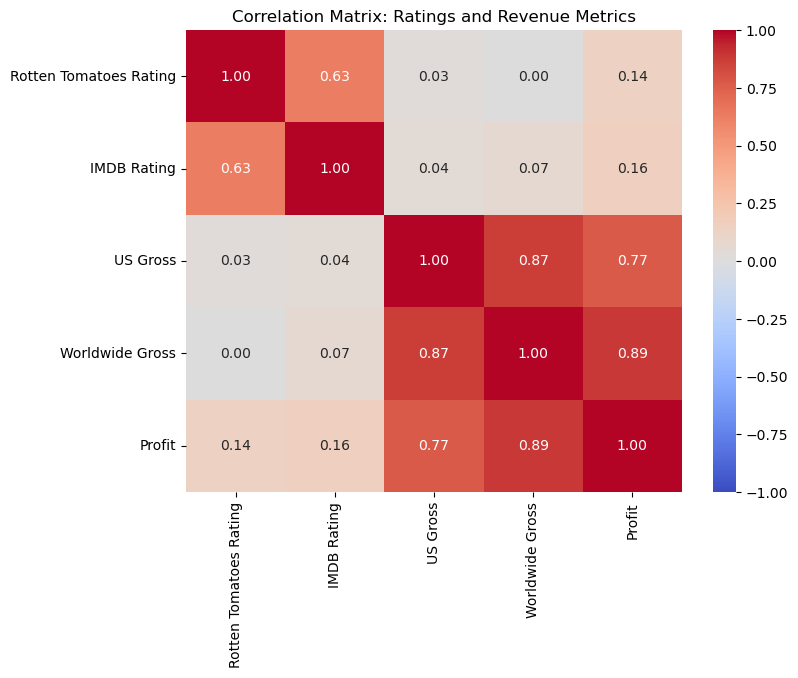

In [6]:
# Calculate correlation between movie ratings and revenue metrics
correlation = data[['Rotten Tomatoes Rating', 'IMDB Rating', 'US Gross', 'Worldwide Gross', 'Profit']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Ratings and Revenue Metrics')
plt.show()

Ratings (Rotten Tomatoes & IMDB):
* Strong Positive Correlation (0.63): Rotten Tomatoes and IMDB ratings are positively correlated. This means movies that are rated highly on Rotten Tomatoes tend to be rated highly on IMDB as well, and vice versa. This makes sense as both platforms reflect audience and critical reception.

Revenue (US Gross & Worldwide Gross):
* Very Strong Positive Correlation (0.87): US Gross and Worldwide Gross are very strongly correlated. This is expected, as a film's success in the US is often a strong indicator of its global appeal.

Profit and Revenue:
* Strong Positive Correlation (0.77 - 0.89): Profit is strongly correlated with both US Gross and Worldwide Gross. This is intuitive, as higher revenue generally leads to higher profits.

Ratings and Revenue:
* Weak Positive Correlation (0.03 - 0.16): The correlations between ratings and revenue (US Gross, Worldwide Gross, Profit) are weak. This suggests that while good ratings might have some influence, they don't guarantee high revenue or profits. Many other factors (marketing, genre, star power, release timing, etc.) play a more significant role.

Key Takeaways
* Ratings Align: Rotten Tomatoes and IMDB ratings tend to agree with each other.
* Domestic Success Drives Global Success: Performance in the US market is a strong predictor of worldwide success.
* Revenue is King: Higher revenue is directly tied to higher profits.
* Ratings are Not Everything: Good ratings don't automatically translate to box office success or profitability.

This correlation matrix provides a clear visualization of the relationships between different movie metrics. It highlights the strong links between revenue and profit, as well as the alignment between different rating platforms.  It also emphasizes that while ratings are important, they are not the sole determinant of a movie's financial success.

#### Step 2: Movies with Higher Ratings and Gross Revenue

We'll look at how movies with higher Rotten Tomatoes or IMDB ratings perform in terms of revenue by plotting scatter plots.

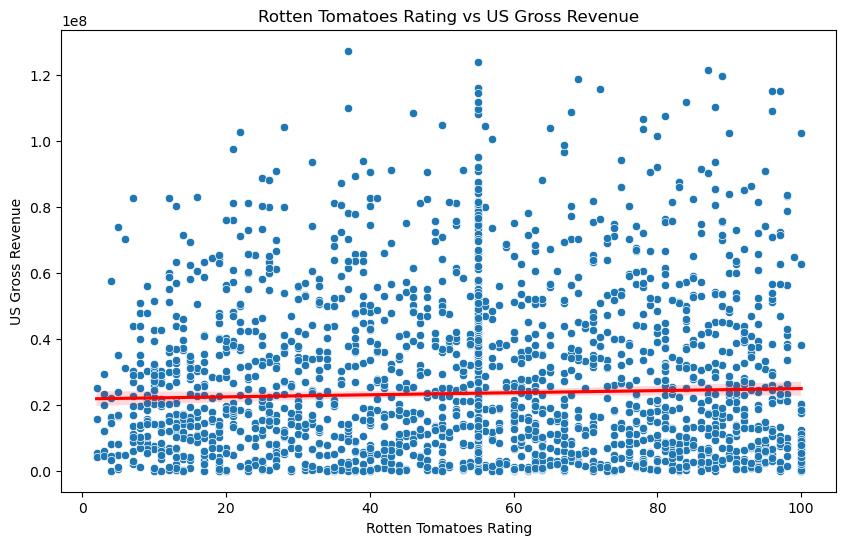

In [7]:
# Scatter plot for Rotten Tomatoes Rating vs US Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rotten Tomatoes Rating', y='US Gross', data=data)

# Add a regression line in red
sns.regplot(x='Rotten Tomatoes Rating', y='US Gross', data=data, scatter=False, color='red')

plt.title('Rotten Tomatoes Rating vs US Gross Revenue')
plt.xlabel('Rotten Tomatoes Rating')
plt.ylabel('US Gross Revenue')
plt.show()

* Weak Positive Correlation: While there's a slight tendency for movies with higher Rotten Tomatoes scores to have higher US Gross Revenue, the correlation is weak. This means that a high rating doesn't guarantee a high box office return.
* Wide Scatter: The data points are widely scattered across the chart, indicating a lot of variability. This shows that other factors besides critical ratings significantly influence a movie's financial success.
* Outliers: There are some movies with very high revenue despite having moderate to low Rotten Tomatoes scores. These could be blockbuster hits with strong marketing or appeal to a specific audience.
* Concentration at Low Revenue: A large number of movies cluster at the bottom of the chart, indicating low US Gross Revenue. This suggests that many movies struggle to achieve significant box office success, regardless of their critical reception.

Key Takeaways:
* Critical acclaim (Rotten Tomatoes Rating) is not a strong predictor of US Gross Revenue.
* Many factors contribute to a movie's financial success besides critical ratings.
* There are outliers that defy the general trend, indicating that other factors (marketing, genre, timing, etc.) can play a significant role.

This scatter plot reinforces the idea that while a good Rotten Tomatoes score might be helpful, it's not the sole determinant of a movie's box office performance.  The film industry is complex, and many elements contribute to a movie's success.

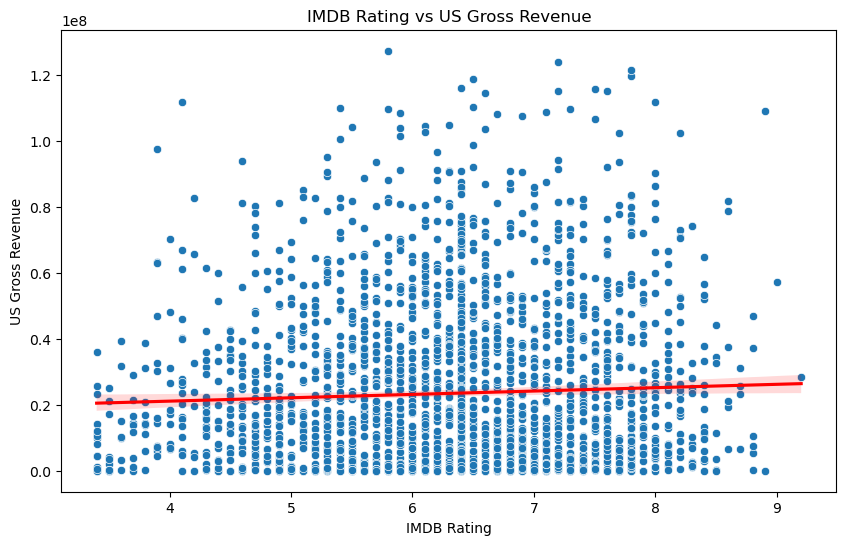

In [8]:
# Scatter plot for IMDB Rating vs US Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB Rating', y='US Gross', data=data)

# Add a regression line in red
sns.regplot(x='IMDB Rating', y='US Gross', data=data, scatter=False, color='red')

plt.title('IMDB Rating vs US Gross Revenue')
plt.xlabel('IMDB Rating')
plt.ylabel('US Gross Revenue')
plt.show()

* Weak Positive Correlation: Similar to the Rotten Tomatoes vs. US Gross Revenue chart, there's a weak positive correlation between IMDB Rating and US Gross Revenue. Movies with higher IMDB ratings tend to have slightly higher US Gross Revenue, but the relationship is not strong.
* Wide Scatter: The data points are widely scattered, indicating a lot of variability. This suggests that IMDB rating alone is not a reliable predictor of a movie's financial success.
* Outliers: There are some movies with very high revenue despite having moderate to low IMDB scores. These are likely blockbuster hits with broad appeal, even if they didn't resonate with all IMDB users.
* Concentration at Low Revenue: A large number of movies cluster at the bottom of the chart, indicating low US Gross Revenue. This suggests that many movies struggle to achieve significant box office success, regardless of their IMDB rating.
* Trend of Increasing Revenue with Rating (Slightly): While the correlation is weak, we can see a slight trend of the data points trending upwards as IMDB rating increases. This indicates that higher IMDB ratings might have a modest positive influence on revenue.

Key Takeaways:
* IMDB Rating is not a strong predictor of US Gross Revenue.
* Many factors contribute to a movie's financial success besides user ratings.
* There are outliers that defy the general trend, indicating that other factors (marketing, genre, timing, etc.) can play a significant role.

This scatter plot reinforces the idea that while a good IMDB rating might be helpful, it's not the sole determinant of a movie's box office performance. The film industry is complex, and many elements contribute to a movie's success.

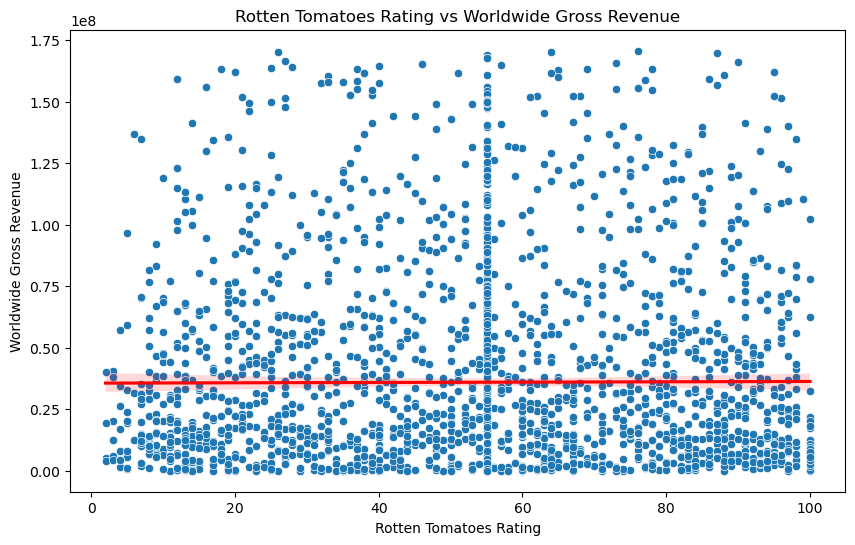

In [9]:
# Scatter plot for Rotten Tomatoes Rating vs Worldwide Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rotten Tomatoes Rating', y='Worldwide Gross', data=data)

# Add a regression line in red
sns.regplot(x='Rotten Tomatoes Rating', y='Worldwide Gross', data=data, scatter=False, color='red')

plt.title('Rotten Tomatoes Rating vs Worldwide Gross Revenue')
plt.xlabel('Rotten Tomatoes Rating')
plt.ylabel('Worldwide Gross Revenue')
plt.show()

* Weak Positive Correlation: Similar to the US Gross Revenue charts, there's a weak positive correlation between Rotten Tomatoes Rating and Worldwide Gross Revenue. Movies with higher Rotten Tomatoes scores tend to have slightly higher Worldwide Gross Revenue, but the relationship is not strong.
* Wide Scatter: The data points are widely scattered, indicating a lot of variability. This suggests that Rotten Tomatoes rating alone is not a reliable predictor of a movie's global financial success.
* Outliers: There are some movies with very high revenue despite having moderate to low Rotten Tomatoes scores. These are likely blockbuster hits with broad international appeal, even if they didn't resonate with critics.
* Concentration at Low Revenue: A large number of movies cluster at the bottom of the chart, indicating low Worldwide Gross Revenue. This suggests that many movies struggle to achieve significant global box office success, regardless of their critical reception.
* Trend of Increasing Revenue with Rating (Slightly): While the correlation is weak, we can see a slight trend of the data points trending upwards as Rotten Tomatoes rating increases. This indicates that higher ratings might have a modest positive influence on global revenue.

Key Takeaways:
* Rotten Tomatoes Rating is not a strong predictor of Worldwide Gross Revenue.
* Many factors contribute to a movie's global financial success besides critical ratings.
* There are outliers that defy the general trend, indicating that other factors (marketing, genre, timing, international appeal, etc.) can play a significant role.

This scatter plot reinforces the idea that while a good Rotten Tomatoes score might be helpful, it's not the sole determinant of a movie's global box office performance. The film industry is complex, and many elements contribute to a movie's success on a worldwide scale.

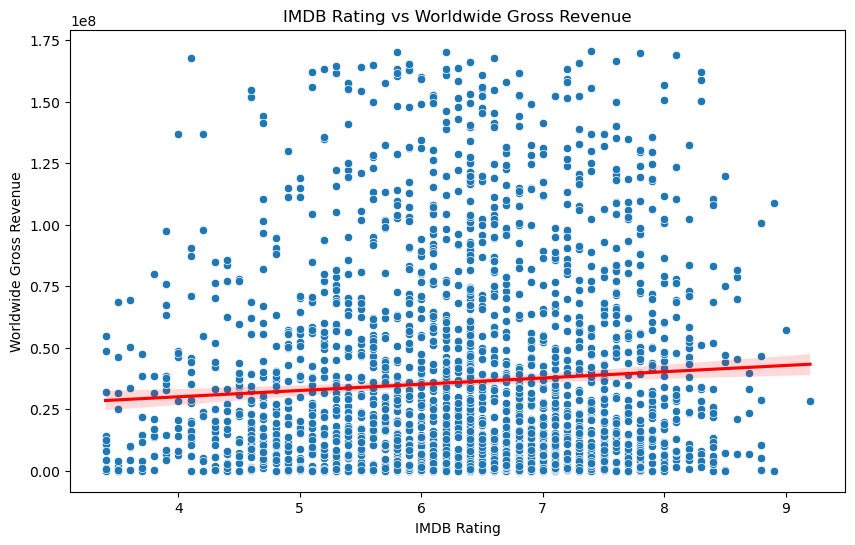

In [10]:
# Scatter plot for IMDB Rating vs Worldwide Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB Rating', y='Worldwide Gross', data=data)

# Add a regression line in red
sns.regplot(x='IMDB Rating', y='Worldwide Gross', data=data, scatter=False, color='red')

plt.title('IMDB Rating vs Worldwide Gross Revenue')
plt.xlabel('IMDB Rating')
plt.ylabel('Worldwide Gross Revenue')
plt.show()

* Weak Positive Correlation: Similar to the other charts we've analyzed, there's a weak positive correlation between IMDB Rating and Worldwide Gross Revenue. Movies with higher IMDB ratings tend to have slightly higher Worldwide Gross Revenue, but the relationship is not strong.
* Wide Scatter: The data points are widely scattered, indicating a lot of variability. This suggests that IMDB rating alone is not a reliable predictor of a movie's global financial success.
* Outliers: There are some movies with very high revenue despite having moderate to low IMDB scores. These are likely blockbuster hits with broad international appeal, even if they didn't resonate with all IMDB users.
* Concentration at Low Revenue: A large number of movies cluster at the bottom of the chart, indicating low Worldwide Gross Revenue. This suggests that many movies struggle to achieve significant global box office success, regardless of their IMDB rating.
* Trend of Increasing Revenue with Rating (Slightly): While the correlation is weak, we can see a slight trend of the data points trending upwards as IMDB rating increases. This indicates that higher ratings might have a modest positive influence on global revenue.

Key Takeaways:
* IMDB Rating is not a strong predictor of Worldwide Gross Revenue.
* Many factors contribute to a movie's global financial success besides user ratings.
* There are outliers that defy the general trend, indicating that other factors (marketing, genre, timing, international appeal, etc.) can play a significant role.

This scatter plot reinforces the idea that while a good IMDB rating might be helpful, it's not the sole determinant of a movie's global box office performance. The film industry is complex, and many elements contribute to a movie's success on a worldwide scale.

#### Step 3: Distribution of Ratings for Successful vs Unsuccessful Movies

We can classify movies as "successful" or "unsuccessful" based on their profitability (e.g., positive vs. negative profit) and compare the distribution of ratings.

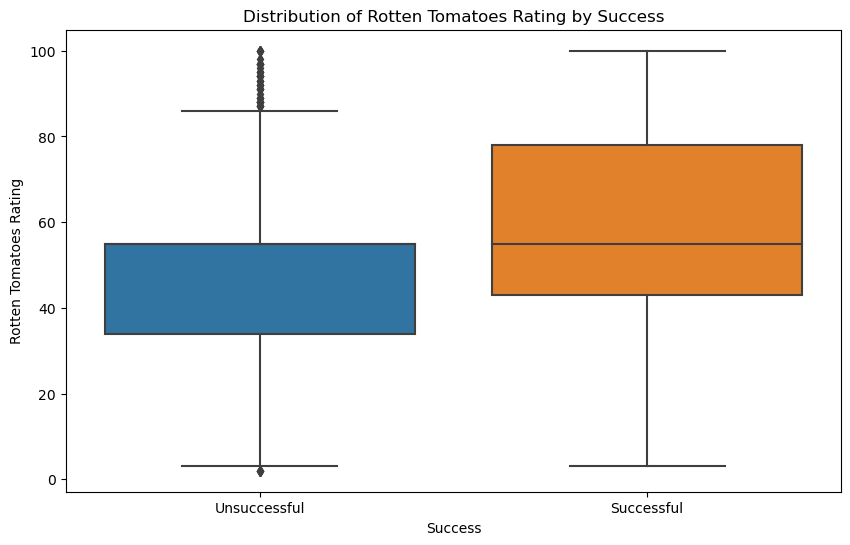

In [11]:
# Create a new column to classify movies as 'successful' or 'unsuccessful'
data['Success'] = data['Profit'].apply(lambda x: 'Successful' if x > 0 else 'Unsuccessful')

# Box plot for Rotten Tomatoes Rating distribution by Success
plt.figure(figsize=(10, 6))
sns.boxplot(x='Success', y='Rotten Tomatoes Rating', data=data)
plt.title('Distribution of Rotten Tomatoes Rating by Success')
plt.xlabel('Success')
plt.ylabel('Rotten Tomatoes Rating')
plt.show()

* Profitability and Critical Ratings: The box plot shows that movies that made a profit (Successful) tended to have higher Rotten Tomatoes ratings compared to movies that did not make a profit (Unsuccessful).
* Median Profitability: The median Rotten Tomatoes Rating for profitable movies is significantly higher than for unprofitable movies. This suggests that positive critical reception might contribute to profitability.
* Range of Ratings: Profitable movies also exhibit a wider range of higher ratings, indicating that while high ratings are more common in profitable films, they are not exclusive to them.
* Unprofitable Acclaim: The outliers in the Unsuccessful category show that some critically acclaimed movies failed to generate profit. This highlights the fact that critical success doesn't guarantee financial success. Factors like marketing, distribution, and audience preferences play a significant role.
* Profitability Without Critical Praise: The presence of successful movies with lower ratings suggests that other factors (e.g., strong marketing, popular genre, star power) can drive profitability even without high critical scores.

Key Takeaways:
* Profitability is associated with higher Rotten Tomatoes Ratings on average.
* Critical acclaim might contribute to profitability, but it's not the sole determinant.
* Other factors besides critical ratings significantly influence a movie's profitability.

This box plot, with the profit-based definition of success, demonstrates that positive critical reception (as measured by Rotten Tomatoes) is often correlated with profitability, but it's not a foolproof predictor.

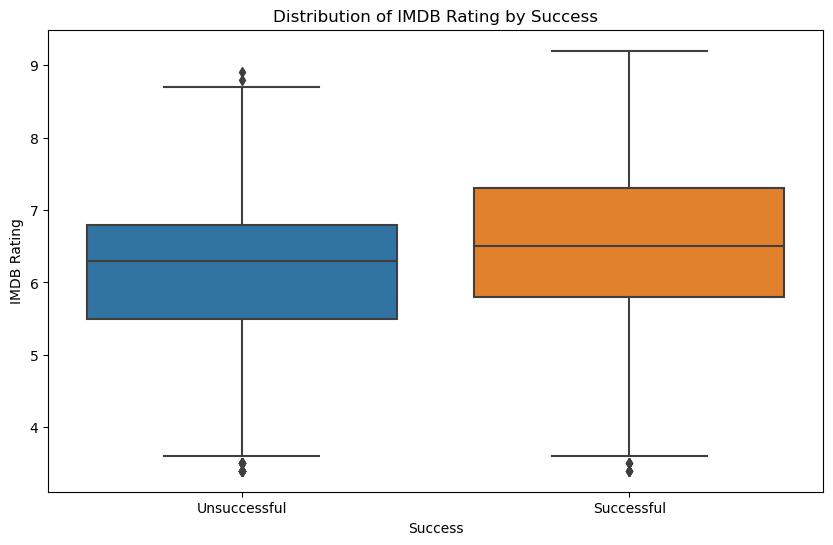

In [12]:
# Box plot for IMDB Rating distribution by Success
plt.figure(figsize=(10, 6))
sns.boxplot(x='Success', y='IMDB Rating', data=data)
plt.title('Distribution of IMDB Rating by Success')
plt.xlabel('Success')
plt.ylabel('IMDB Rating')
plt.show()

* Median Difference: The median IMDB Rating for Successful movies is slightly higher than the median rating for Unsuccessful movies. This suggests that, on average, successful movies tend to have slightly higher user ratings.
* IQR Comparison: The IQR (box height) for Successful movies is slightly higher than the IQR for Unsuccessful movies. This indicates that the middle 50% of successful movies have a wider range of slightly higher IMDB ratings compared to unsuccessful movies.
* Overlap: There is significant overlap between the boxes, suggesting that IMDB Rating alone is not a perfect predictor of success. Some unsuccessful movies have relatively high ratings, and some successful movies have lower ratings.
* Outliers: Both categories have outliers, indicating movies with unusually high or low IMDB ratings compared to the rest of their respective groups.

Key Takeaways:
* Successful movies tend to have slightly higher IMDB Ratings on average.
* However, the relationship is not deterministic. There are successful movies with lower ratings and unsuccessful movies with higher ratings.
* Other factors besides user ratings play a significant role in a movie's success.

This box plot suggests that while a good IMDB rating might increase the likelihood of success, it's not a guarantee. The film industry is complex, and many elements contribute to a movie's financial performance.

Comparing to Rotten Tomatoes:

It's worth noting that the difference in median ratings between successful and unsuccessful movies seems less pronounced with IMDB ratings compared to Rotten Tomatoes ratings in the previous chart. This might suggest that critical consensus (Rotten Tomatoes) has a slightly stronger relationship with profitability than average user ratings (IMDB). However, both charts show a similar trend: successful movies tend to have higher ratings, but the relationship is not absolute.

#### Step 4:  Investigate Outliers and Anomalies in Ratings and Revenue

We can identify outliers in the rating and revenue columns using box plots and scatter plots.

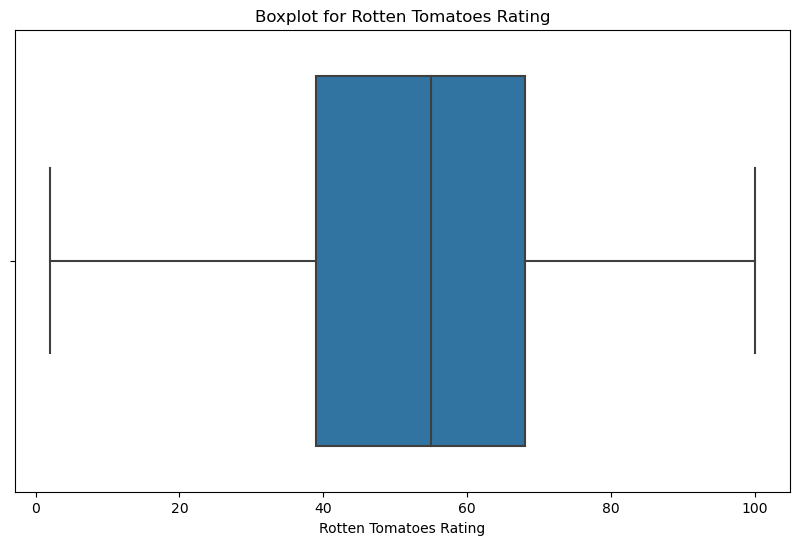

In [13]:
# Box plot for Rotten Tomatoes Rating to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Rotten Tomatoes Rating'])
plt.title('Boxplot for Rotten Tomatoes Rating')
plt.xlabel('Rotten Tomatoes Rating')
plt.show()

* Median: The median Rotten Tomatoes Rating is slightly above 50 (around 52-55). This indicates that the "typical" movie in this dataset has a slightly above-average critical rating.
* Interquartile Range (IQR): The box spans from approximately 40 to 65. This means that the middle 50% of movies in the dataset have Rotten Tomatoes Ratings between 40 and 65.
* Spread: The whiskers extend from approximately 0 to 100. This suggests a wide range of Rotten Tomatoes Ratings in the dataset, from very poorly reviewed to very well-reviewed movies.
* Symmetry: The box and whiskers appear relatively symmetrical around the median. This indicates that the distribution of Rotten Tomatoes Ratings is relatively balanced.

Key Takeaways:
* Wide Range of Ratings: The dataset includes movies with a broad spectrum of critical reception.
* Typical Rating: The "typical" movie in the dataset has a slightly above-average Rotten Tomatoes Rating.
* Balanced Distribution: The distribution of ratings is relatively symmetrical, suggesting a mix of good and bad reviews.

This box plot gives us a visual summary of the distribution of Rotten Tomatoes Ratings in the dataset, highlighting the central tendency, spread, and overall shape of the data.

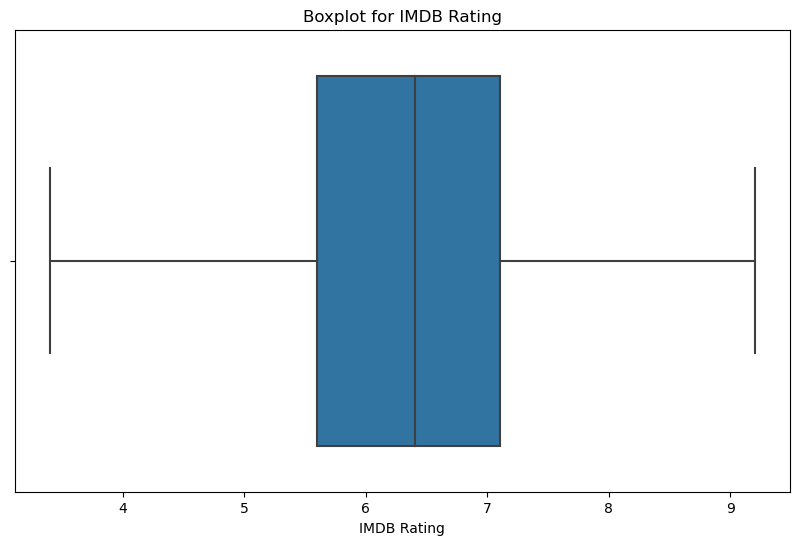

In [14]:
# Box plot for IMDB Rating to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['IMDB Rating'])
plt.title('Boxplot for IMDB Rating')
plt.xlabel('IMDB Rating')
plt.show()

* Median: The median IMDB Rating is slightly above 6 (around 6.2-6.5). This indicates that the "typical" movie in this dataset has a slightly above-average user rating.
* Interquartile Range (IQR): The box spans from approximately 5.8 to 7. This means that the middle 50% of movies in the dataset have IMDB Ratings between 5.8 and 7.
* Spread: The whiskers extend from approximately 3.5 to 9.2. This suggests a wide range of IMDB Ratings in the dataset, from very poorly rated to very highly rated movies.
* Symmetry: The box and whiskers appear relatively symmetrical around the median. This indicates that the distribution of IMDB Ratings is relatively balanced.

Key Takeaways:
* Wide Range of Ratings: The dataset includes movies with a broad spectrum of user ratings.
* Typical Rating: The "typical" movie in the dataset has a slightly above-average IMDB Rating.
* Balanced Distribution: The distribution of ratings is relatively symmetrical, suggesting a mix of good and bad reviews.

This box plot gives us a visual summary of the distribution of IMDB Ratings in the dataset, highlighting the central tendency, spread, and overall shape of the data.

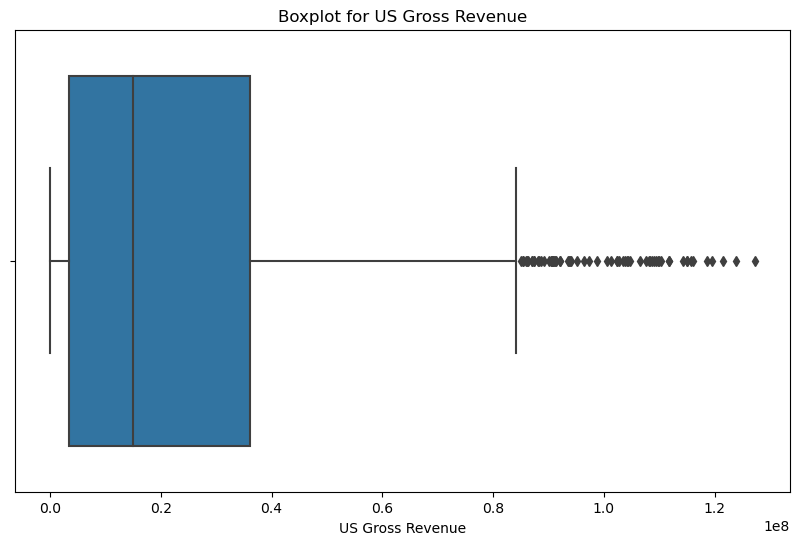

In [15]:
# Box plot for US Gross to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['US Gross'])
plt.title('Boxplot for US Gross Revenue')
plt.xlabel('US Gross Revenue')
plt.show()

* Median: The median US Gross Revenue is relatively low (around 10-20 million dollars). This indicates that the "typical" movie in this dataset earns a modest amount in the US box office.
* Interquartile Range (IQR): The box spans from approximately 0 to 40 million dollars. This means that the middle 50% of movies in the dataset earned between 0 and 40 million dollars in the US.
* Spread: The whiskers extend from approximately 0 to 80 million dollars. This suggests a wide range of US Gross Revenue in the dataset, but most movies fall within the lower end of the range.
* Skewness: The distribution is highly skewed to the right. The large number of outliers on the higher end indicates that a few movies earn significantly more than the majority.
* Outliers: The numerous outliers represent blockbuster hits or highly successful movies that generated exceptional revenue.

Key Takeaways:
* Highly Skewed Distribution: US Gross Revenue is not evenly distributed; a few movies dominate the box office.
* Typical Revenue: The "typical" movie in this dataset earns a relatively low amount in the US box office.
* Blockbuster Effect: The outliers highlight the "blockbuster effect," where a small number of movies generate a disproportionately large share of the total revenue.

This box plot shows that the distribution of US Gross Revenue is heavily skewed, with a large number of movies earning relatively little and a few highly successful movies generating the bulk of the revenue.

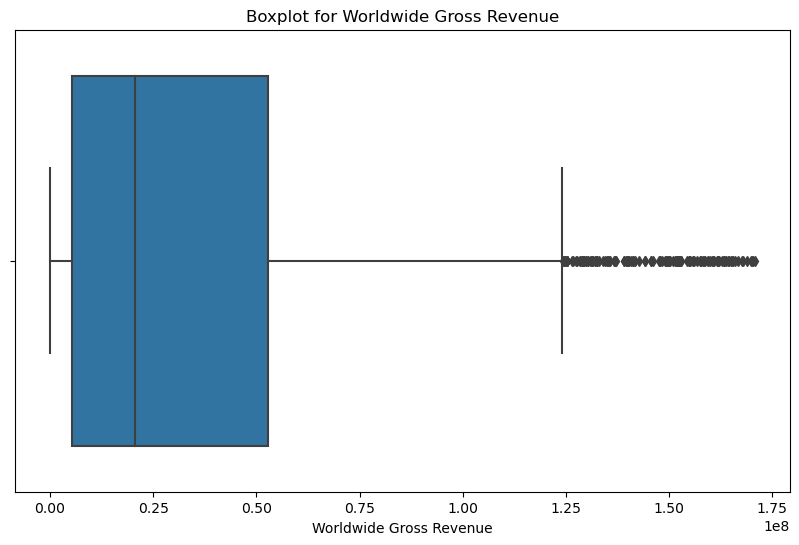

In [16]:
# Box plot for Worldwide Gross to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Worldwide Gross'])
plt.title('Boxplot for Worldwide Gross Revenue')
plt.xlabel('Worldwide Gross Revenue')
plt.show()

* Median: The median Worldwide Gross Revenue is relatively low (around 20-30 million dollars). This indicates that the "typical" movie in this dataset earns a modest amount in the global box office.
* Interquartile Range (IQR): The box spans from approximately 0 to 50 million dollars. This means that the middle 50% of movies in the dataset earned between 0 and 50 million dollars worldwide.
* Spread: The whiskers extend from approximately 0 to 125 million dollars. This suggests a wide range of Worldwide Gross Revenue in the dataset, but most movies fall within the lower end of the range.
* Skewness: The distribution is highly skewed to the right. The large number of outliers on the higher end indicates that a few movies earn significantly more than the majority.
* Outliers: The numerous outliers represent blockbuster hits or highly successful movies that generated exceptional revenue globally.

Key Takeaways:
* Highly Skewed Distribution: Worldwide Gross Revenue is not evenly distributed; a few movies dominate the global box office.
* Typical Revenue: The "typical" movie in this dataset earns a relatively low amount in the global box office.
* Blockbuster Effect: The outliers highlight the "blockbuster effect," where a small number of movies generate a disproportionately large share of the total revenue.

This box plot shows that the distribution of Worldwide Gross Revenue is heavily skewed, with a large number of movies earning relatively little and a few highly successful movies generating the bulk of the revenue. This distribution is very similar to the US Gross Revenue distribution, indicating that the blockbuster effect is a global phenomenon.

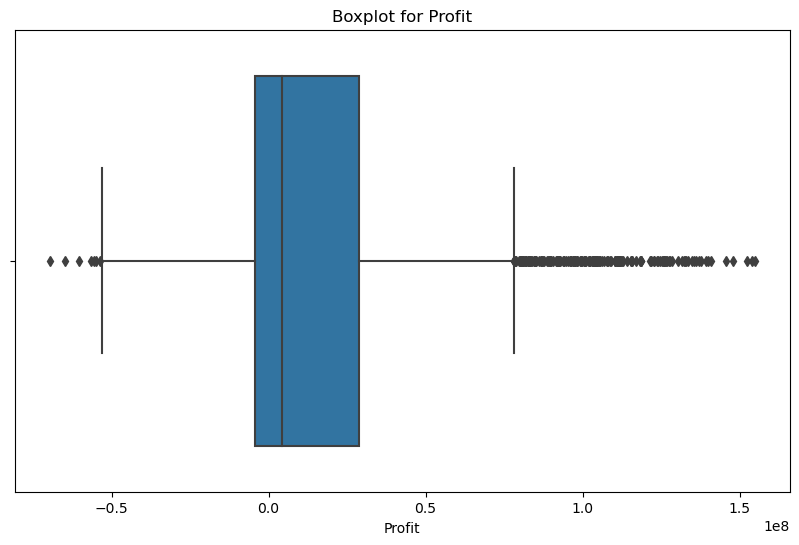

In [17]:
# Box plot for Profit to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Profit'])
plt.title('Boxplot for Profit')
plt.xlabel('Profit')
plt.show()

* Median: The median Profit is slightly above zero. This indicates that the "typical" movie in this dataset breaks even or makes a small profit.
* Interquartile Range (IQR): The box spans from approximately -0.2 to 0.4 billion dollars (or -20 to 40 million dollars). This means that the middle 50% of movies in the dataset had profits ranging from a loss of 20 million dollars to a profit of 40 million dollars.
* Spread: The whiskers extend from approximately -0.6 to 0.8 billion dollars (or -60 to 80 million dollars). This suggests a wide range of profitability in the dataset, with some movies experiencing significant losses and others achieving substantial profits.
* Skewness: The distribution is somewhat skewed to the right, but also exhibits a significant number of negative outliers. This indicates that while there are a few highly profitable movies, there are also many movies that incur losses.

Outliers:
* Negative Outliers: These represent movies that experienced significant financial losses.
* Positive Outliers: These represent blockbuster hits or highly successful movies that generated exceptional profits.

Key Takeaways:
* Wide Range of Profitability: The dataset includes movies with a broad spectrum of profitability, from significant losses to substantial profits.
* Typical Profit: The "typical" movie in the dataset breaks even or makes a small profit.
* Skewness and Outliers: The distribution is skewed, with numerous outliers, highlighting the volatility of the film industry and the "blockbuster effect."

This box plot shows that the distribution of Profit is wide and skewed, with a significant number of movies incurring losses and a few highly successful movies generating the bulk of the profits. This highlights the high-risk, high-reward nature of the film industry.